## Supervised Learning

### What is ML?

- The art and science of:
	- Giving computers the ability to learn to make decisions from data
	- ... without being explicitly programmed!
- Examples:
	- Learning to predict whether an email is spam or not
	- Clustering wikipedia entries into different categories
- Supervised learning: uses labeled data

### Unsupervised learning

- Uncovering hidden patterns from unlabeled data

### Reinforcement learning

- Software agents interact with an environment
	- Learn how to optimize behavior
	- Given a system of rewards and punishments
	- Draws inspiration from behavioral psychology

### Supervised learning

- Predictor variables/features and a target variable
- A column per feature, a row per data point
- Aim: predict the target variable, given the predictor variables
	- Classification: target variable consists of categories
	- Regression: target variable is continuous
- Aimed at:
	- Automating time-consuming or expensive manual tasks
	- Making predictions about the future
- Needs labeled data
	- Historical data with labels
	- Experiments to get labeled data

#### Naming conventions

- Features = predictor variables = independent variables
- Target variable = dependent variable = response variable


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


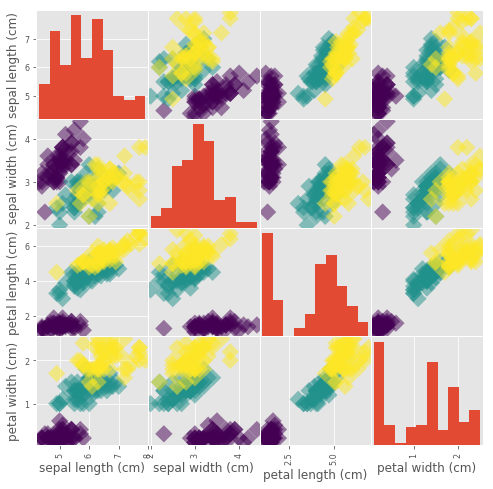

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

iris = datasets.load_iris()

print(type(iris)) # sklearn.utils.Bunch
print(iris.keys())

X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)

pd.plotting.scatter_matrix(df, c=y, figsize=[8, 8], s=150, marker='D')
plt.show()

#### K-Nearest Neighbors

- Basic idea: predict the label of a data point by
	- Looking at the k closest labeled data points
	- taking a majority vote

### Scikit-learn fit and predict

- All machine learning models implemented as Python classes
	- they implement the algorithms for learning and predicting
	- and store the information learned from the data
- Training a model on the data = 'fitting' a model to the data
	- .fit() method
- To predict the labels of new data: .predict() method


In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(iris['data'],iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

~~~
prediction = knn.predict(X_new)

print('Prediction {}'.format(prediction))
~~~

### Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?

- Could compute accuracy on data used for fitting
	- NOT indicative of ability to generalize
- Split data into training and test set
	- Fit/train the classifier on the training set
	- Make predictions on test set
	- Compare predictions with the known labels

#### Model complexity

- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

knn.score(X_test,y_test) # accuracy

0.9555555555555556

### Introduction to Regression

~~~
boston = pd.read_csv('boston.csv')

X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Predicting from a single value
X_rooms = X[:,5]

y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Fitting a regression model
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
~~~

### Regression mechanics

- $y = a\ x + b$
	- $y$: target
	- $x$: single feature
	- $a,\ b$: parameters of the model
- How do we choose $a$ and $b$?
- Define an error function for any given line (loss function)
	- Choose the line that minimizes the error function

#### The loss function

- Ordinary least squares (OLS): minimize sum of squares of residuals

### Linear regression in higher dimensions

$y = a_1\ x_1 + a_2\ x_2 + a_3\ x_3 + ... + a_n\ x_n + b$

- Must specify coefficient for each feature and the variable $b$.

#### Linear Regression on all features

~~~
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test) # R squared
~~~

### Cross-validation motivation

- Model performance is dependent on way the data is split
- Not representative of the model's ability to generalize
- Solution: Cross-validation!

### Cross-validation in scikit-learn

~~~
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=5)
~~~

### Why regularize?

- Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
- Penalizing large coefficients: Regularization

#### Ridge Regression

- Loss function = OLS loss function + $ \alpha \cdot \displaystyle\sum_{i=1}^{n} a^2_i $
- Alpha: parameter we need to choose

- In scikit-learn:

~~~
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test,y_test)
~~~

#### Lasso Regression

- Loss function = OLS loss function + $ \alpha \cdot \displaystyle\sum_{i=1}^{n} |a_i| $

- In scikit-learn:

~~~
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train,y_train)

lasso_pred = ridge.predict(X_test)

lasso.score(X_test,y_test)
~~~

- Can be used to select important features of a data set
- Shrinks the coefficients of less important features exactly to zero

- Lasso feature selection:

~~~
from sklearn.linear_model import Lasso

names = boston.drop('MEDV', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coeffs')
plt.show()
~~~

### Diagnosing classification predictions

- Confusion matrix

|       X       | Predicted A         | Predicted ¬A        |
|:-------------:|---------------------|---------------------|
| **Actual A**  | True Positive (TP)  | False Negative (FN) |
| **Actual ¬A** | False Positive (FP) | True Negative (TN)  |

- Accuracy: $\displaystyle\frac{TP + TN}{TP + TN + FP + FN}$


- Precision ($p$): $\displaystyle\frac{TP}{TP + FP}$


- Recall ($r$): $\displaystyle\frac{TP}{TP + FN}$


- F1 score: $2 \cdot \displaystyle\frac{p \cdot r}{p + r}$
	- Harmonic mean of precision and recall.


- High precision: not many real emails precited as spam
- High recall: predicted most spam emails correctly

#### In scikit-learn


In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

   micro avg       0.98      0.98      0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## Logistic Regression

- outputs probabilities
- if the probability $p > 0.5$:
	- the data is labeled $1$
- if the probability $p < 0.5$:
	- the data is labeled $0$

#### In scikit-learn

~~~
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
~~~

#### Probability thresholds

- By default, logistic regression threshold $= 0.5$.
- What happens when we vary this threshold?

#### The ROC curve

- The Receiver Operating Characteristic curve
	- "a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied."

~~~
from sklearn.metrics import roc_curve

# probabilities of labels being 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Log. Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log. Regression ROC curve')
plt.show()
~~~

### Area under the ROC curve (AUC)

- Larger area = better model

#### In scikit-learn

~~~
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, y_pred_prob))
~~~

#### Using cross-validation

~~~
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_scores)
~~~

### Hyperparameter tuning

- Linear regression: choosing parameters
- Ridge/Lasso regression: choosing $\alpha$ (alpha)
- k-Nearest Neighbors: choosing $k$ (n_neighbors)

- Hyperparameters cannot be learned by fitting the model

#### Choosing the correct hyperparameter

- Try a bunch of different hyperparameter values
- Fit all of them separately
- See how well each performs
- Choose the best performing one

- It is essential to use cross-validation

#### Grid search cross-validation

|   C/Alpha   |  0.1  |   0.2   |
|:-----------:|:-----:|:-------:|
|   **0.1**   | 0.723 | *0.810* |
|   **0.2**   | 0.765 |  0.778  |
|   **0.3**   | 0.623 |  0.692  |

#### In scikit-learn

~~~
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

print(knn_cv.best_params_)
print(knn_cv.best_score_) # greatest mean cv_score
~~~

### Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

~~~
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
~~~

### Hold-out set reasoning

- How well can the model perform on never seen data?
- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set

### Elastic Net

Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

$a \cdot L1 + b \cdot L2$

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.


### Dealing with categorical features

- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy variables'
	- 0: observation was not that category
	- 1: observation was that category

#### Dummy variables

|  Origin |
|:-------:|
|  Europe |
|   Asia  |
| America |

becomes...

| Origin_Europe | Origin_Asia | Origin_America |
|:-------------:|-------------|----------------|
|       1       |      0      |        0       |
|       0       |      1      |        0       |
|       0       |      0      |        1       |

removing duplicate information...

| Origin_Europe | Origin_Asia |
|:-------------:|-------------|
|       1       |      0      |
|       0       |      1      |
|       0       |      0      |

#### In Python

- scikit-learn: OneHotEncoder()
- pandas: get_dummies()

~~~
import pandas as pd

df = pd.read_csv('auto.csv')

df_origin = pd.get_dummies(df)

print(df_origin.head())

df_origin = df_origin.drop('origin_Asia', axis=1)
~~~

#### Liner Regression with dummy variables

~~~
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

ridge.score(X_test, y_test)
~~~

### Dropping missing data

~~~
df = df.dropna()
~~~

### Imputing missing data

- Making an educated guess about the missing values
- Example: using the mean of the non-missing entries

~~~
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

imp.fit(X)

X = imp.transform(X)
~~~

### Imputing within a pipeline

~~~
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

logreg = LogisticRegression()

steps = [('imputation', imp), ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)
~~~

#### Example

~~~
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
~~~

### Why scale your data?

- Many models use some form of distance to inform themselves
- Features on larger scales can unduly influence the model

#### Ways to normalize your data

- Standardization: subtract the mean and divide by variance
	- All features are centered around zero and have variance one
- Subtract the minimum and divide by the range
	- Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1

#### Scaling in scikit-learn

~~~
from sklearn.preprocessing import scale

X_scaled = scale(X)

print(np.mean(X), np.std(X))
print(np.mean(X_scaled), np.std(X_scaled))
~~~

#### Scaling in a pipeline

~~~
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(accuracy_score(y_test, y_pred))
~~~

#### CV and scaling in a pipeline

~~~
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier())]

pipeline = Pipeline(steps)

# only apply to knn param
parameters = {knn__n_neighbors=np.arange(1,50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print(cv.best_pramas_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))
~~~